# Visualizing Global COVID-19 data


### Data Source: [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19)
#### Fan Wang 
#### March 30

--------------------

In this notebook, we demonstrate the visualization of the Johns Hopkins COVID-19 data currently available in a Gen3 Data Commons.
The results from this notebook are purely for demonstration purposes and should not be interpreted as scientifically rigorous.

## Setup

### Install dependencies

Uncomment the lines for packages you need to install and run the cell.

In [ ]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn

### Load required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from gen3.auth import Gen3Auth
from gen3.submission import Gen3Submission

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="ticks", color_codes=True)
%config InlineBackend.figure_format = 'svg'

## Extract data from the COVID-19 Data Repository by Johns Hopkins CSSE

we can easily extract the `time series` data from https://github.com/CSSEGISandData/COVID-19

In [2]:
confirmed_cases_data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovery_cases_data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

Once the data is defined, we can simply load them into three pandas dataframes. 

In [3]:
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

## Confirmed cases over time

### Extract data for plotting

In [4]:
# Group by region
data_day = (
    raw_data_confirmed.groupby(["Country/Region"]).sum().drop(["Lat", "Long"], axis=1)
)
df = data_day.transpose()
data = data_day.reset_index().melt(id_vars="Country/Region", var_name="date")
data.loc[(data.value < 1), "value"] = None
# Pivot data to wide & index by date
df = data.pivot(index="date", columns="Country/Region", values="value")
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

### Visualize confirmed cases by in top 10 most infected country/region

This chart indicates the country/region with largest number of confirmed cases as of the recent update

In [5]:
df_latest = df.iloc[[-1]]
df_latest1 = df_latest.transpose()
top_10_infected = df_latest1.sort_values(by = df_latest1.columns[0], ascending=False).head(10)
top_10_infected

date,2020-04-09
Country/Region,
US,461437.0
Spain,153222.0
Italy,143626.0
France,118781.0
Germany,118181.0
China,82883.0
Iran,66220.0
United Kingdom,65872.0
Turkey,42282.0


### Visualize confirmed cases

These plots contains data from January 22, 2020 and we focus on China, US, Italy, France, and Spain.

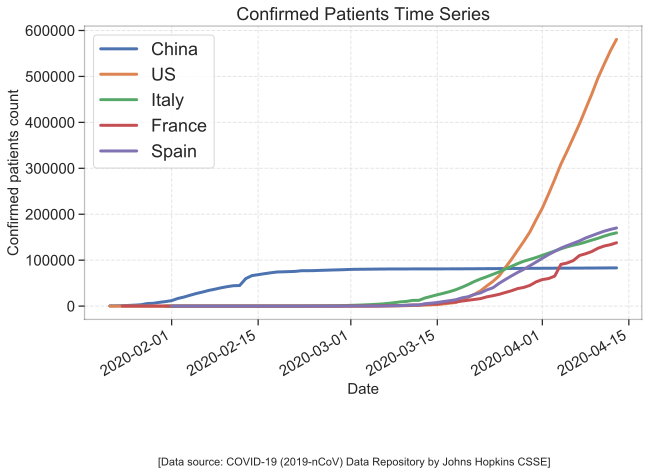

In [6]:
poi = ["China", "US", "Italy", "France", "Spain"]
df[poi].plot(figsize=(10, 6), linewidth=3, fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(loc=2, prop={"size": 18})
plt.ylabel("Confirmed patients count", fontsize=15)
plt.suptitle(
    "[Data source: COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE]",
    fontsize=11,
    y=-0.12,
)
plt.title("Confirmed Patients Time Series", fontsize=18)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

In logarithmic scale:

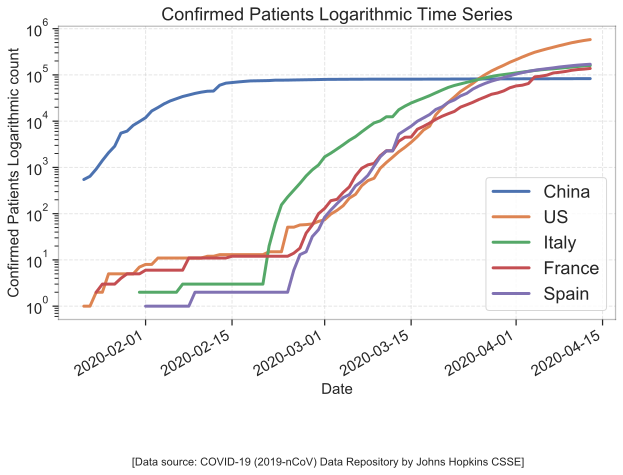

In [7]:
df[poi].plot(figsize=(10, 6), linewidth=3, fontsize=15, logy=True)
plt.xlabel("Date", fontsize=15)
plt.legend(loc=4, prop={"size": 18})
plt.ylabel("Confirmed Patients Logarithmic count", fontsize=15)
plt.suptitle(
    "[Data source: COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE]",
    fontsize=11,
    y=-0.12,
)
plt.title("Confirmed Patients Logarithmic Time Series", fontsize=18)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

#### Summarization of trends

* US and West European countries have continued increases in the number of confirmed cases.
* US not only has the largest number of confirmed cases in the world, it also has one of the highest rates of coronavirus spread among the selected countries. 
* China has stablized the coronavirus outbreak as the number of new cases has dropped.

## COVID-19 deaths over time

### Extract data for plotting

In [8]:
# Group by region
data_day = (
    raw_data_deaths.groupby(["Country/Region"]).sum().drop(["Lat", "Long"], axis=1)
)
df = data_day.transpose()
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars="Country/Region", var_name="date")
data.loc[(data.value < 25), "value"] = None
# Pivot data to wide & index by date
df = data.pivot(index="date", columns="Country/Region", values="value")
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

### Visualize deaths over time

These plots contains data from January 22, 2020 and we focus on China, US, Italy, France, and Spain.

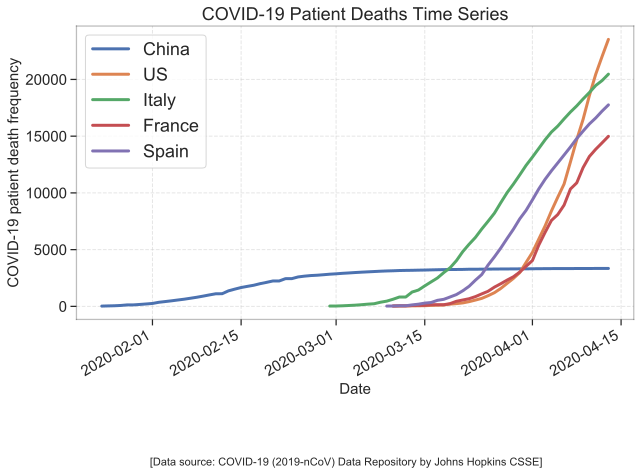

In [9]:
df[poi].plot(figsize=(10, 6), linewidth=3, fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(loc=2, prop={"size": 18})
plt.ylabel("COVID-19 patient death frequency", fontsize=15)
plt.suptitle(
    "[Data source: COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE]",
    fontsize=11,
    y=-0.12,
)
plt.title("COVID-19 Patient Deaths Time Series", fontsize=18)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

#### Summarization of the trends:

* Italy and Spain have the highest number of COVID-19 deaths (15,887 and 12,641 deaths respectively) as of April 6, 2020. 
* The frequency of deaths in China have started to stabilize.

## Recovered patients over time

### Extract data for plotting

In [10]:
# Group by region
data_day = (
    raw_data_recovered.groupby(["Country/Region"]).sum().drop(["Lat", "Long"], axis=1)
)
df = data_day.transpose()
data = data_day.reset_index().melt(id_vars="Country/Region", var_name="date")
data.loc[(data.value < 1), "value"] = None
# Pivot data to wide & index by date
df = data.pivot(index="date", columns="Country/Region", values="value")
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

### Visualize recovered patients over time

These plots contains data from January 22, 2020 and we focus on China, US, Italy, France, and Spain.

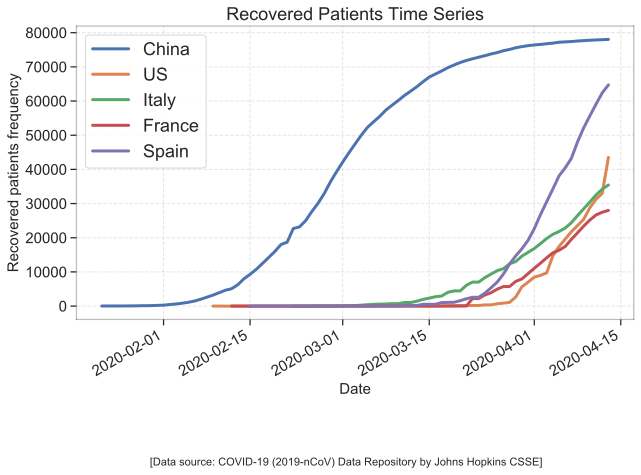

In [11]:
poi = ["China", "US", "Italy", "France", "Spain"]
df[poi].plot(figsize=(10, 6), linewidth=3, fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(loc=2, prop={"size": 18})
plt.ylabel("Recovered patients frequency", fontsize=15)
plt.suptitle(
    "[Data source: COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE]",
    fontsize=11,
    y=-0.12,
)
plt.title("Recovered Patients Time Series", fontsize=18)
plt.grid(linestyle="--", alpha=0.5)
plt.gca().spines["top"].set_alpha(0.3)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.3)
plt.gca().spines["left"].set_alpha(0.3)

#### Summarization of the trends:

* Fortunately, most of the confirmed cases tend to recover.

## Conclusion

Here, we demonstrate the ability to visualize relevant longitudinal COVID-19 data within a Gen3 data commons.